In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("../Dataset/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
id = data["PassengerId"]
id.head()

0    1
1    2
2    3
3    4
4    5
Name: PassengerId, dtype: int64

In [7]:
data["Family"] = data["Parch"] + data["SibSp"]                              ##Green

family_corr = data.iloc[:, [1, 6, 7, 12]]
family_corr.head()

,Survived,SibSp,Parch,Family
0,0,1,0,1
1,1,1,0,1
2,1,0,0,0
3,1,1,0,1
4,0,0,0,0


<Axes: title={'center': 'Family size, Family members and Survival'}>

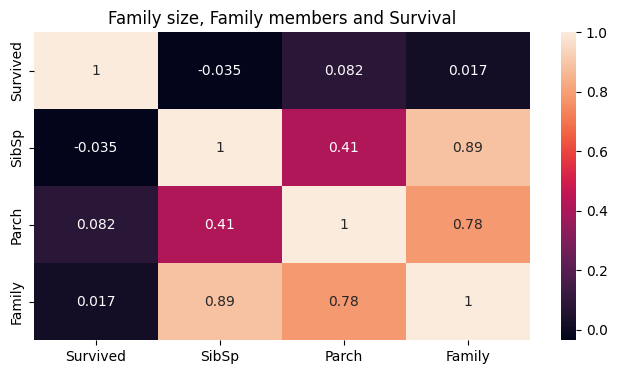

In [8]:
plt.figure(figsize=(8,4))
plt.title("Family size, Family members and Survival")
sns.heatmap(family_corr.corr(), annot = True)

In [9]:
def fam_category(s):                                        ##Green
    if s == 0:
        return "Alone"
    elif 0<s<4:
        return "Small_fam"
    else:
        return "Big_fam"
    
data["Family"] =  data["Family"].apply(fam_category)

In [10]:
pd.crosstab(data['Family'], data["Survived"])

Survived,0,1
Family,,
Alone,374,163
Big_fam,52,10
Small_fam,123,169


<Axes: title={'center': 'Family Category and their survival percentage'}, xlabel='Survived', ylabel='Family'>

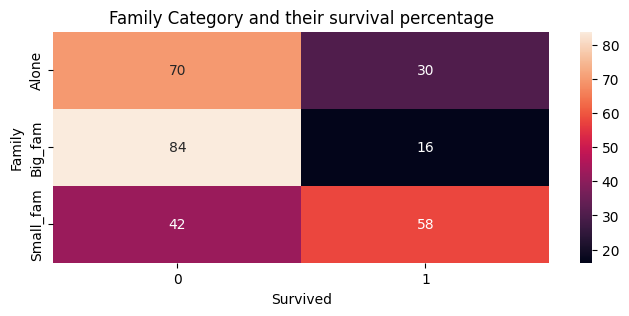

In [11]:
ct = pd.crosstab(data['Family'], data["Survived"])
percentages = ct.div(ct.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8,3))
plt.title("Family Category and their survival percentage")
sns.heatmap(percentages, annot=True)

<Axes: title={'center': 'Passenger Category and their survival percentage'}, xlabel='Survived', ylabel='Pclass'>

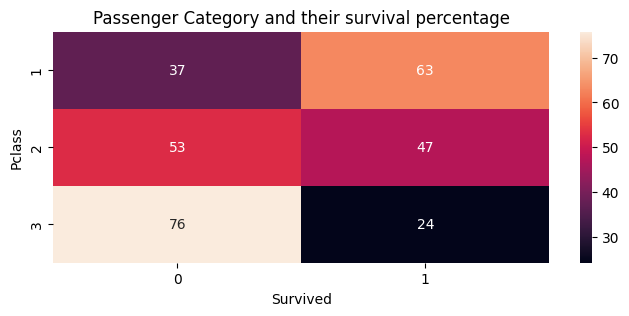

In [12]:
ct_class = pd.crosstab(data['Pclass'], data["Survived"])                                #Green
passenger_percentage = ct_class.div(ct_class.sum(axis=1), axis=0) * 100

plt.figure(figsize=(8,3))
plt.title("Passenger Category and their survival percentage")
sns.heatmap(passenger_percentage, annot=True)

In [13]:
pd.crosstab(data['Sex'], data["Survived"])[1]

Sex
female    233
male      109
Name: 1, dtype: int64

<Axes: title={'center': 'Is it true that female survived the most?'}, xlabel='Sex', ylabel='Survived'>

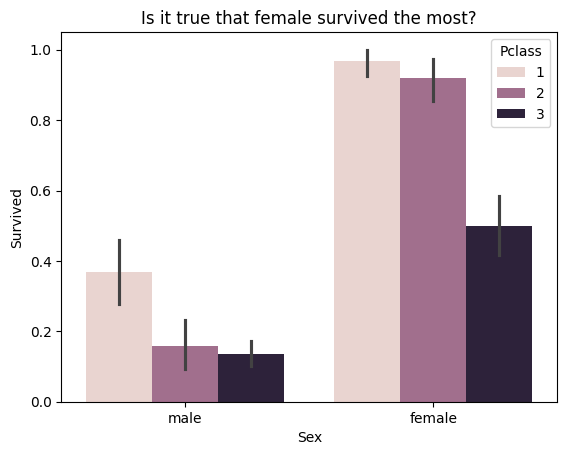

In [14]:
plt.title("Is it true that female survived the most?")
sns.barplot(data, x = data["Sex"], y = data["Survived"], hue = data["Pclass"])

In [15]:
data["Name"].unique()

array(['Braund, Mr. Owen Harris',
       'Cumings, Mrs. John Bradley (Florence Briggs Thayer)',
       'Heikkinen, Miss. Laina',
       'Futrelle, Mrs. Jacques Heath (Lily May Peel)',
       'Allen, Mr. William Henry', 'Moran, Mr. James',
       'McCarthy, Mr. Timothy J', 'Palsson, Master. Gosta Leonard',
       'Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)',
       'Nasser, Mrs. Nicholas (Adele Achem)',
       'Sandstrom, Miss. Marguerite Rut', 'Bonnell, Miss. Elizabeth',
       'Saundercock, Mr. William Henry', 'Andersson, Mr. Anders Johan',
       'Vestrom, Miss. Hulda Amanda Adolfina',
       'Hewlett, Mrs. (Mary D Kingcome) ', 'Rice, Master. Eugene',
       'Williams, Mr. Charles Eugene',
       'Vander Planke, Mrs. Julius (Emelia Maria Vandemoortele)',
       'Masselmani, Mrs. Fatima', 'Fynney, Mr. Joseph J',
       'Beesley, Mr. Lawrence', 'McGowan, Miss. Anna "Annie"',
       'Sloper, Mr. William Thompson', 'Palsson, Miss. Torborg Danira',
       'Asplund, Mrs. Carl Oscar 

In [16]:
data["Name"] = data["Name"].apply(lambda x: x.split(","))

In [17]:
data["Name"]

0                             [Braund,  Mr. Owen Harris]
1      [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                              [Heikkinen,  Miss. Laina]
3        [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                            [Allen,  Mr. William Henry]
                             ...                        
886                             [Montvila,  Rev. Juozas]
887                      [Graham,  Miss. Margaret Edith]
888          [Johnston,  Miss. Catherine Helen "Carrie"]
889                             [Behr,  Mr. Karl Howell]
890                               [Dooley,  Mr. Patrick]
Name: Name, Length: 891, dtype: object

In [18]:
length = [i for i in data["Name"] if len(i)>2]
length

[]

In [19]:
data["Surname"] = data["Name"].apply(lambda x : x[0])

In [20]:
data["Title"] = data["Name"].apply(lambda s: s[1].split()[0])
data["Title"]

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Title, Length: 891, dtype: object

In [21]:
data["Title"].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.', 'the',
       'Jonkheer.'], dtype=object)

In [22]:
ct_title = pd.crosstab(data['Title'], data["Survived"])
Title_percentage = (ct_title.div(ct_title.sum(axis=1), axis=0) * 100).round(2)


<Axes: title={'center': 'Name titles and their survival percentage'}, xlabel='Survived', ylabel='Title'>

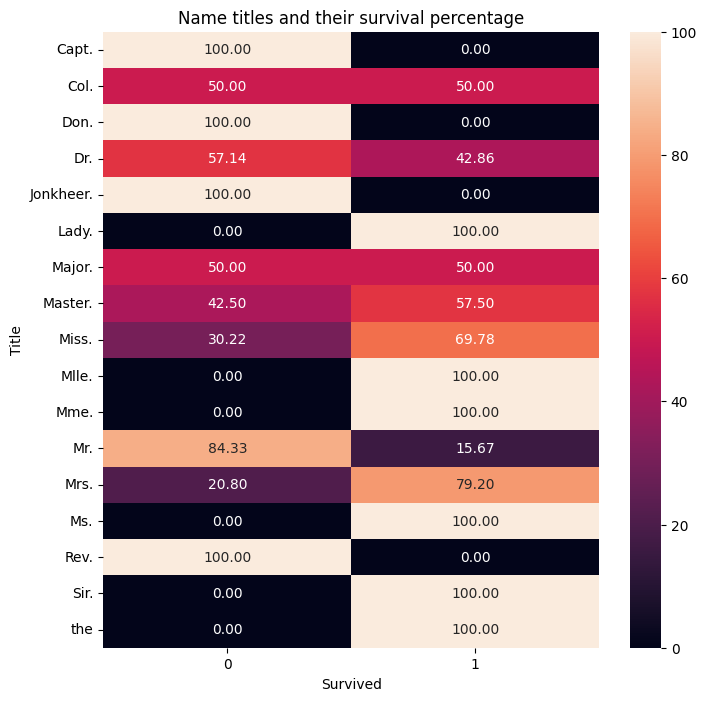

In [23]:
ct_title = pd.crosstab(data['Title'], data["Survived"])
Title_percentage = (ct_title.div(ct_title.sum(axis=1), axis=0) * 100)                           ##Green Forest

plt.figure(figsize=(8,8))
plt.title("Name titles and their survival percentage")
sns.heatmap(Title_percentage, annot=True, fmt = '.2f')

<Axes: xlabel='Age', ylabel='Count'>

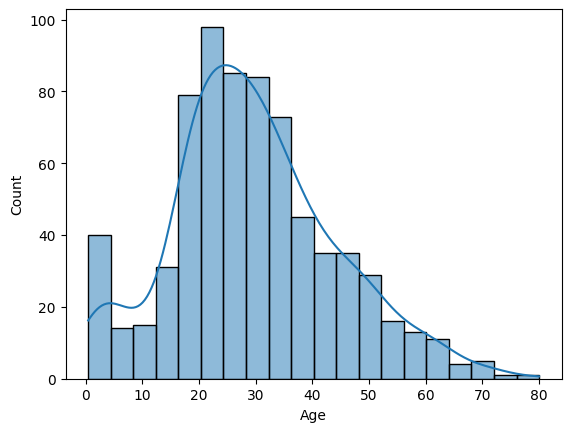

In [24]:
sns.histplot(data["Age"], kde=True)

In [25]:
def ageCategory(x):
    if x<15:
        return "Childrens"
    elif x<35:
        return "Adults"
    elif x<60:
        return "Middle"
    else:
        return "old"
    
data["Age_cat"] = data["Age"].apply(ageCategory)

In [26]:
data["Age_cat"]

0      Adults
1      Middle
2      Adults
3      Middle
4      Middle
        ...  
886    Adults
887    Adults
888       old
889    Adults
890    Adults
Name: Age_cat, Length: 891, dtype: object

<Axes: title={'center': 'Age_cats and their survival percentage'}, xlabel='Survived', ylabel='Age_cat'>

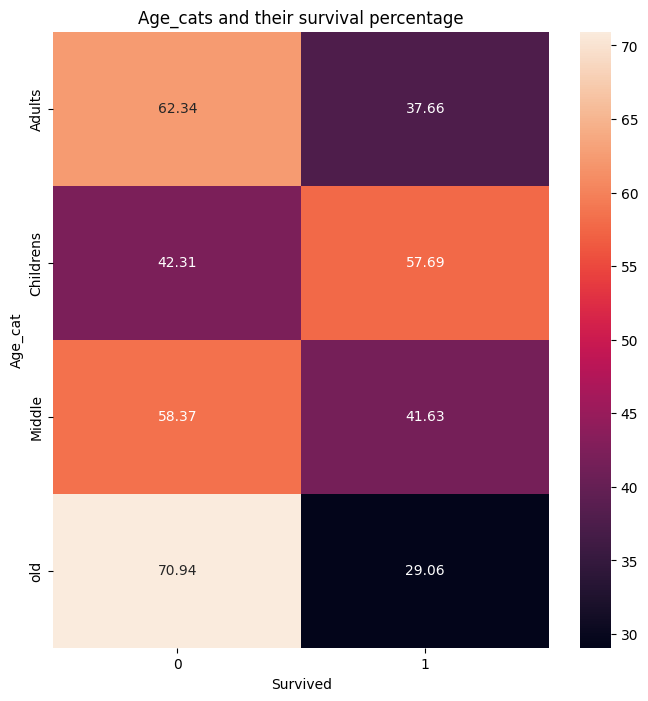

In [27]:
ct_Age_cat = pd.crosstab(data['Age_cat'], data["Survived"])                                         ##REd
Age_cat_percentage = (ct_Age_cat.div(ct_Age_cat.sum(axis=1), axis=0) * 100)

plt.figure(figsize=(8,8))
plt.title("Age_cats and their survival percentage")
sns.heatmap(Age_cat_percentage, annot=True, fmt = '.2f')

In [28]:
def ageCategory2(x):                                                 #Green
    if x<7:
        return "Childrens"
    elif x<20:
        return "teen"
    elif x<40:
        return "Peak"
    elif x<60:
        return "Senior"
    else:
        return "old"
    
data["Age_cat2"] = data["Age"].apply(ageCategory2)

<Axes: title={'center': 'Age_cats and their survival percentage'}, xlabel='Survived', ylabel='Age_cat2'>

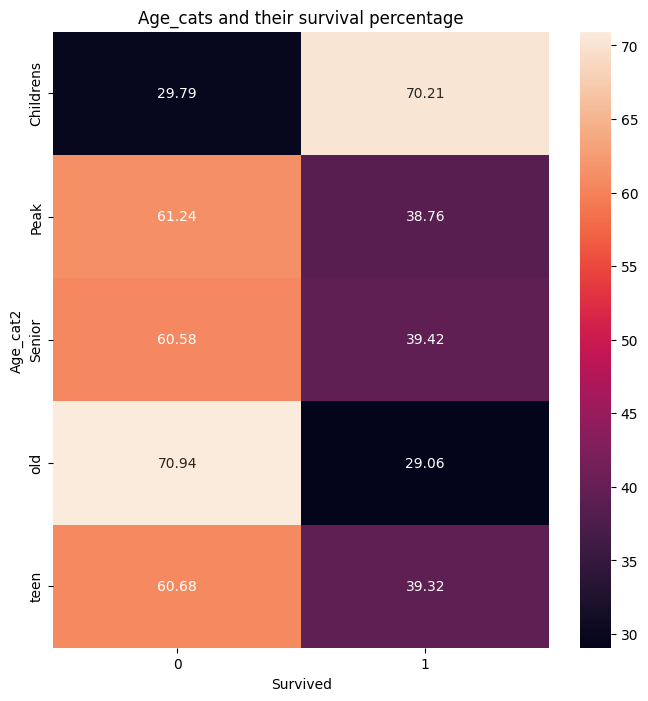

In [29]:
ct_Age_cat2 = pd.crosstab(data['Age_cat2'], data["Survived"])                                         ##Green
Age_cat_percentage2 = (ct_Age_cat2.div(ct_Age_cat2.sum(axis=1), axis=0) * 100)

plt.figure(figsize=(8,8))
plt.title("Age_cats and their survival percentage")
sns.heatmap(Age_cat_percentage2, annot=True, fmt = '.2f')

In [30]:
data.groupby("Pclass")["Fare"].mean()                   ##Fill null with the mean for the each catgory 

Pclass
1    84.154687
2    20.662183
3    13.675550
Name: Fare, dtype: float64

In [31]:
data["Ticket"].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [32]:
data["Ticket_cat"] = data["Ticket"].apply(lambda s: s.split()[0])
data["Ticket_cat"] = np.where(data["Ticket_cat"].str.isdigit(), "NA", data["Ticket_cat"])           ##Check if you need to put NA or np.nan
data["Ticket_cat"]

0           A/5
1            PC
2      STON/O2.
3            NA
4            NA
         ...   
886          NA
887          NA
888       W./C.
889          NA
890          NA
Name: Ticket_cat, Length: 891, dtype: object

In [33]:
data["Ticket_cat"].value_counts()       #17 attributes + 1 Insignificant

Ticket_cat
NA            661
PC             60
C.A.           27
STON/O         12
A/5            10
W./C.           9
SOTON/O.Q.      8
CA.             8
A/5.            7
SOTON/OQ        7
CA              6
STON/O2.        6
F.C.C.          5
SC/PARIS        5
C               5
S.O.C.          5
SC/Paris        4
LINE            4
PP              3
A/4.            3
A/4             3
S.O./P.P.       3
SC/AH           3
A./5.           2
P/PP            2
A.5.            2
WE/P            2
SOTON/O2        2
S.C./PARIS      2
S.C./A.4.       1
Fa              1
S.O.P.          1
SO/C            1
S.P.            1
W.E.P.          1
A4.             1
A/S             1
SC              1
SW/PP           1
SCO/W           1
W/C             1
S.W./PP         1
F.C.            1
C.A./SOTON      1
Name: count, dtype: int64

In [34]:
data["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [35]:
data["Cabin"] = data["Cabin"].str[0]                                            ##GREEN, use this with missing indicator on

In [36]:
data['Cabin']

0      NaN
1        C
2      NaN
3        C
4      NaN
      ... 
886    NaN
887      B
888    NaN
889      C
890    NaN
Name: Cabin, Length: 891, dtype: object

In [37]:
##Fill embarked with the mode
##For the age fill with mean

<Axes: title={'center': 'Cabins and their survival percentage'}, xlabel='Survived', ylabel='Cabin'>

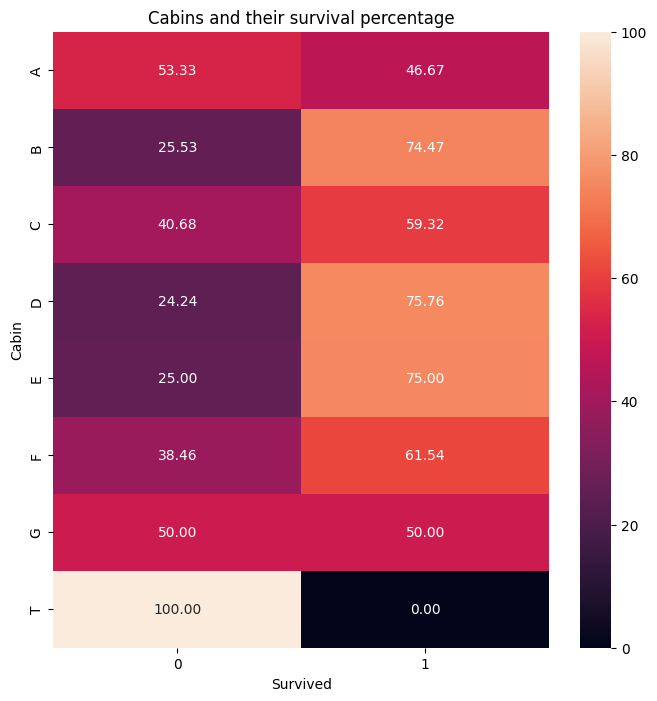

In [38]:
ct_Cabin = pd.crosstab(data['Cabin'], data["Survived"])                                         ##Green
Cabin_percentage = (ct_Cabin.div(ct_Cabin.sum(axis=1), axis=0) * 100)

plt.figure(figsize=(8,8))
plt.title("Cabins and their survival percentage")
sns.heatmap(Cabin_percentage, annot=True, fmt = '.2f')

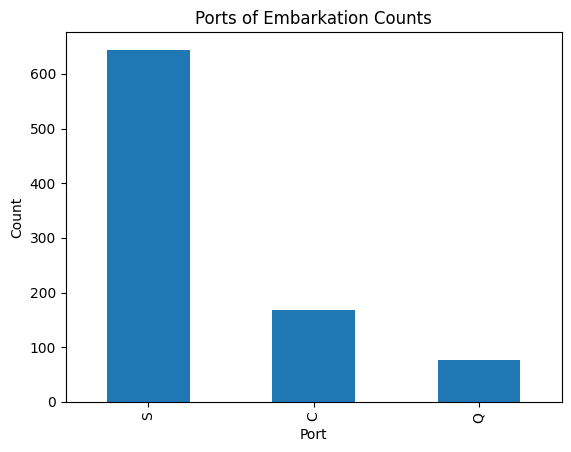

In [39]:
data['Embarked'].value_counts().plot(kind='bar')
plt.title('Ports of Embarkation Counts')
plt.xlabel('Port')
plt.ylabel('Count')
plt.show()